In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create your dataset
np.random.seed(42)
x1 = np.random.rand(100)
x2 = np.random.rand(100)
x3 = np.random.rand(100)
x4 = np.random.rand(100)
noise = np.random.rand(100)
y = x1 + x2**2 + x3*x4

# Create a DataFrame
data = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 'noise': noise, 'y': y})

# Convert the data to torch tensors
X = torch.tensor(data[['x1', 'x2', 'x3', 'x4', 'noise']].values, dtype=torch.float32)
Y = torch.tensor(data['y'].values, dtype=torch.float32).unsqueeze(1)  # unsqueeze to add a dimension for the output

In [3]:
# number of features
nof = 5
# Define the neural network model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(nof, nof)
        self.fc2 = nn.Linear(nof, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [4]:
# Initialize the model
model = SimpleNN()

In [5]:
# Define loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
epochs = 10000
for epoch in range(epochs):
    model.train()

    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, Y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [6]:
# Get the model's weights
weights = model.fc1.weight.data.numpy()

# Analyze the weights to infer feature importance
feature_importance = np.abs(weights).mean(axis=0)

# Print feature importance
print("Feature Importance:")
print(f"x1: {feature_importance[0]:.4f}")
print(f"x2: {feature_importance[1]:.4f}")
print(f"x3: {feature_importance[2]:.4f}")
print(f"x4: {feature_importance[3]:.4f}")
print(f"noise: {feature_importance[4]:.4f}")

Feature Importance:
x1: 0.2959
x2: 0.4316
x3: 0.1875
x4: 0.2968
noise: 0.1645


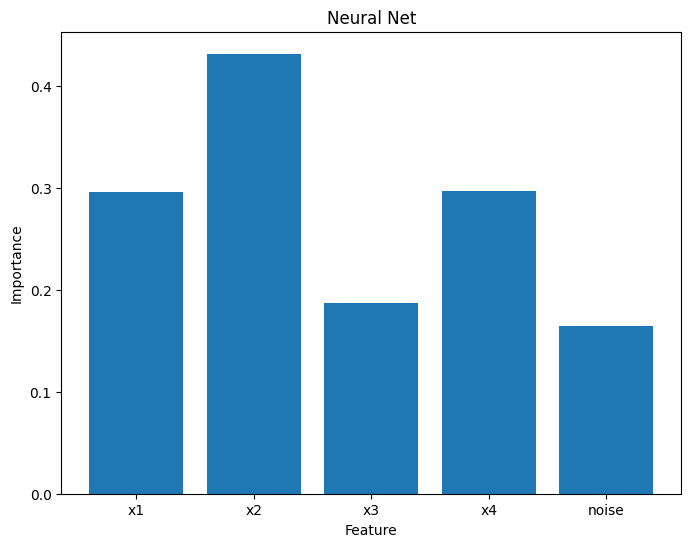

In [7]:
plt.figure(figsize=(8, 6))
plt.bar(data.columns[:-1], feature_importance)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Neural Net")
plt.savefig("figs/neural_net.png", format='png')
plt.show()